In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [ ]:
x_train.shape

(60000, 28, 28)

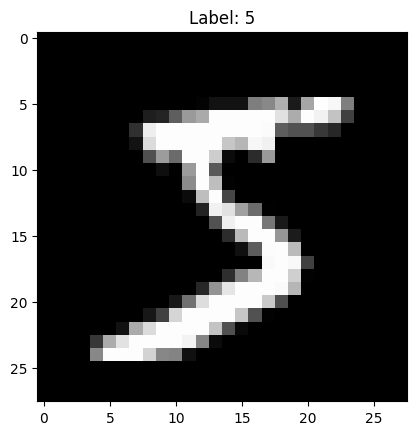

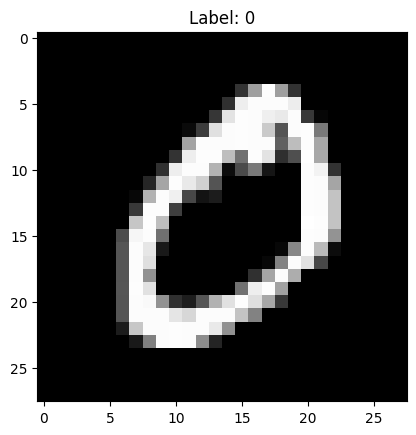

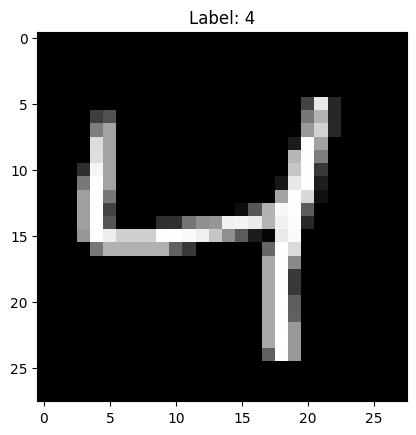

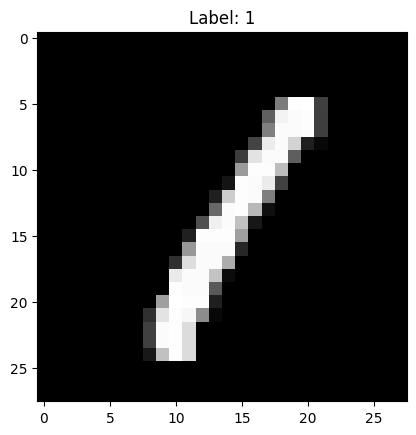

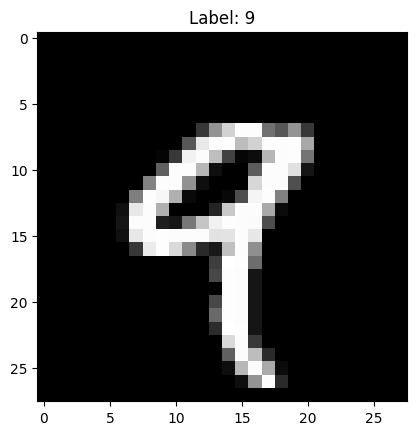

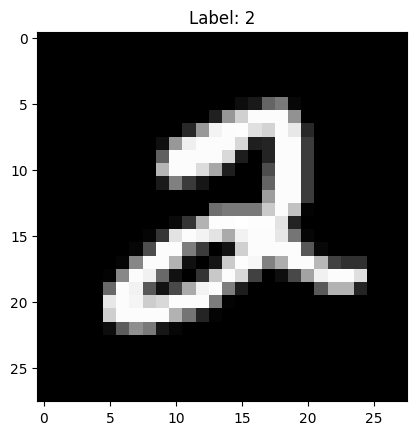

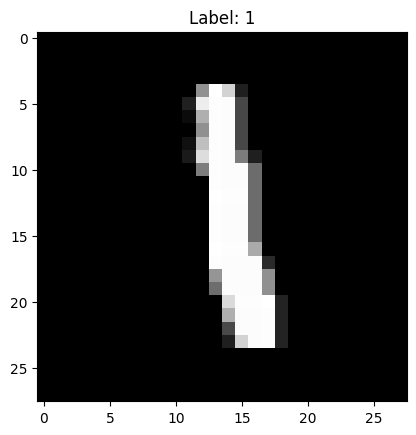

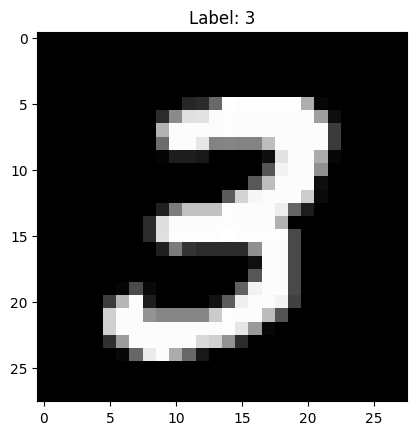

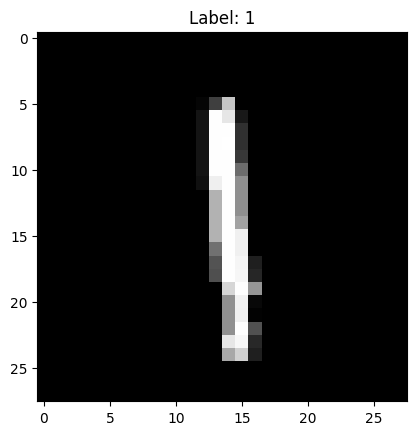

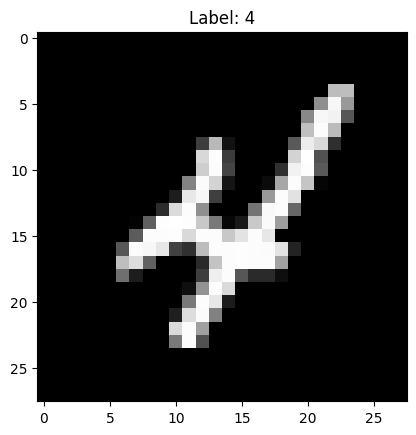

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.show()


In [ ]:

# Normalize the input data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
# Build the feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/4
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2452 - accuracy: 0.9286 - val_loss: 0.1431 - val_accuracy: 0.9568
Epoch 2/4
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1068 - accuracy: 0.9674 - val_loss: 0.1060 - val_accuracy: 0.9684
Epoch 3/4
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0752 - accuracy: 0.9770 - val_loss: 0.1013 - val_accuracy: 0.9683
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9742
Test accuracy: 0.9742000102996826


In [ ]:
model.save('mnist_ffnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 64ms/step


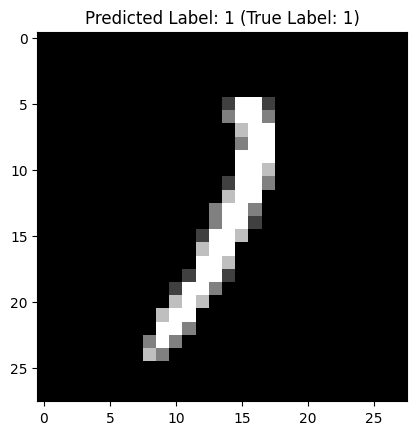

Predicted Label: 1
True Label: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Load the trained model
model = load_model('mnist_ffnn_model.h5')

# Select a random image from the test set
random_index = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_index]
random_label = y_test[random_index]

# Preprocess the image for prediction
random_image_reshaped = random_image.reshape(1, 28, 28)

# Make a prediction
prediction = model.predict(random_image_reshaped)
predicted_label = np.argmax(prediction)

# Display the random image and the predicted label
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label} (True Label: {random_label})")
plt.show()

print(f"Predicted Label: {predicted_label}")
print(f"True Label: {random_label}")
